This analysis aims to answer the question: Is the AFL getting more competitive over time?

We can define competitive in this study as as the ability for bottom teams to rise up over the years, vice versa for top teams

In [1]:
import default_settings

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('data_clean.csv')
data.head()

,team,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,year
0,Richmond,7.0,12.0,9.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,2018
1,West Coast,14.0,8.0,5.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2018
2,Collingwood,16.0,16.0,14.0,10.0,5.0,10.0,9.0,11.0,10.0,8.0,7.0,6.0,6.0,4.0,2.0,2.0,3.0,3.0,3.0,6.0,5.0,3.0,3.0,NaN,2018
3,Hawthorn,3.0,4.0,8.0,4.0,7.0,4.0,4.0,5.0,9.0,10.0,10.0,11.0,9.0,9.0,10.0,8.0,10.0,8.0,7.0,5.0,4.0,4.0,4.0,NaN,2018
4,Melbourne,10.0,6.0,4.0,12.0,14.0,12.0,10.0,6.0,3.0,3.0,3.0,5.0,4.0,6.0,7.0,6.0,6.0,7.0,6.0,4.0,7.0,7.0,5.0,NaN,2018


Get all last round info only into one dataframe (regardless of how many rounds it has)

In [4]:
def get_last_round(df, year):
    df = df[df['year'] == year].dropna(axis = 1)
    return df.columns[-2]

In [5]:
def get_last_round_columns(df, year):
    last_round = get_last_round(df, year)
    df = df[df['year'] == year]
    return df[['team', 'year', last_round]].rename(columns = {last_round:'last_round'})

In [6]:
# get all last rounds
df = data.copy()
dfs = []
for year in df['year'].drop_duplicates():
    dfs.append(get_last_round_columns(df, year))
df = pd.concat(dfs, axis = 0)
last_rounds = df
df.head()

,team,year,last_round
0,Richmond,2018,1.0
1,West Coast,2018,2.0
2,Collingwood,2018,3.0
3,Hawthorn,2018,4.0
4,Melbourne,2018,5.0


Find out how much each team's final ladder position has changed over time

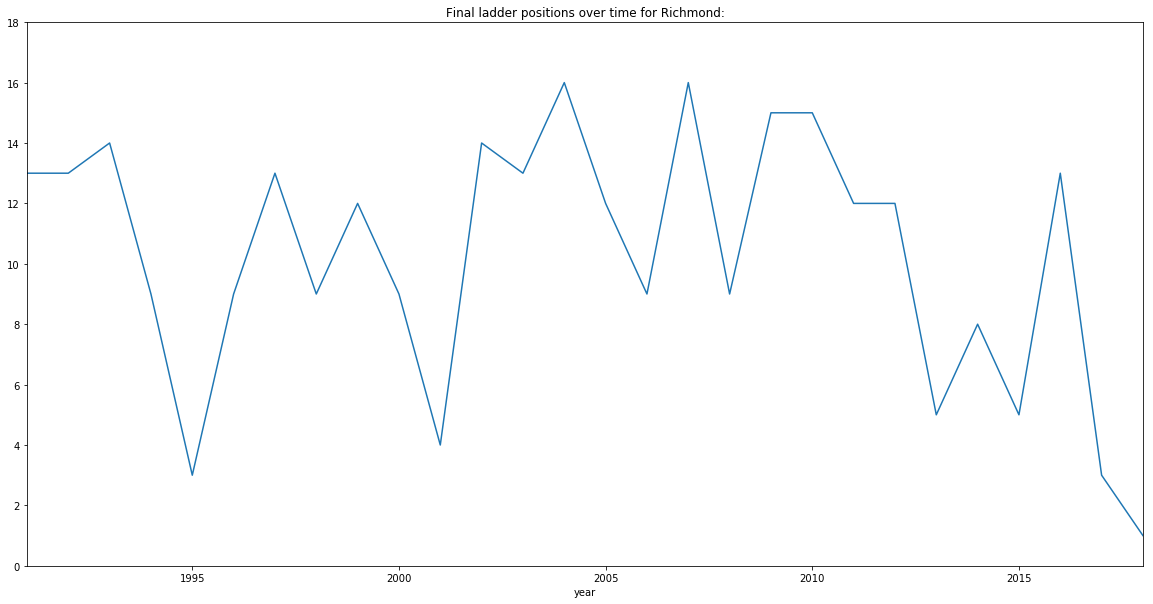

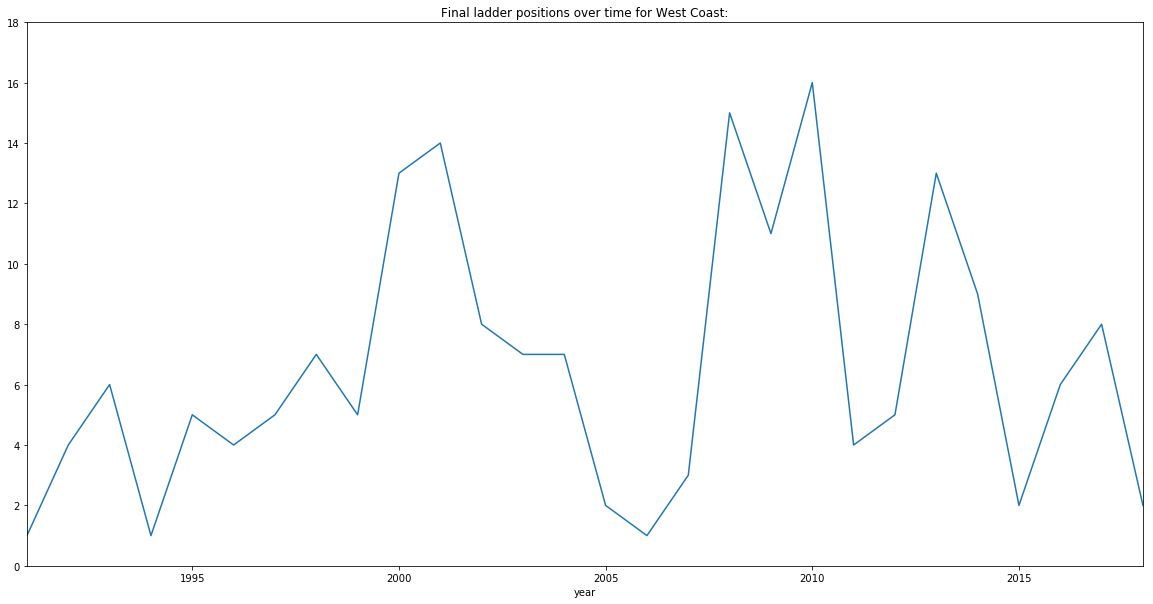

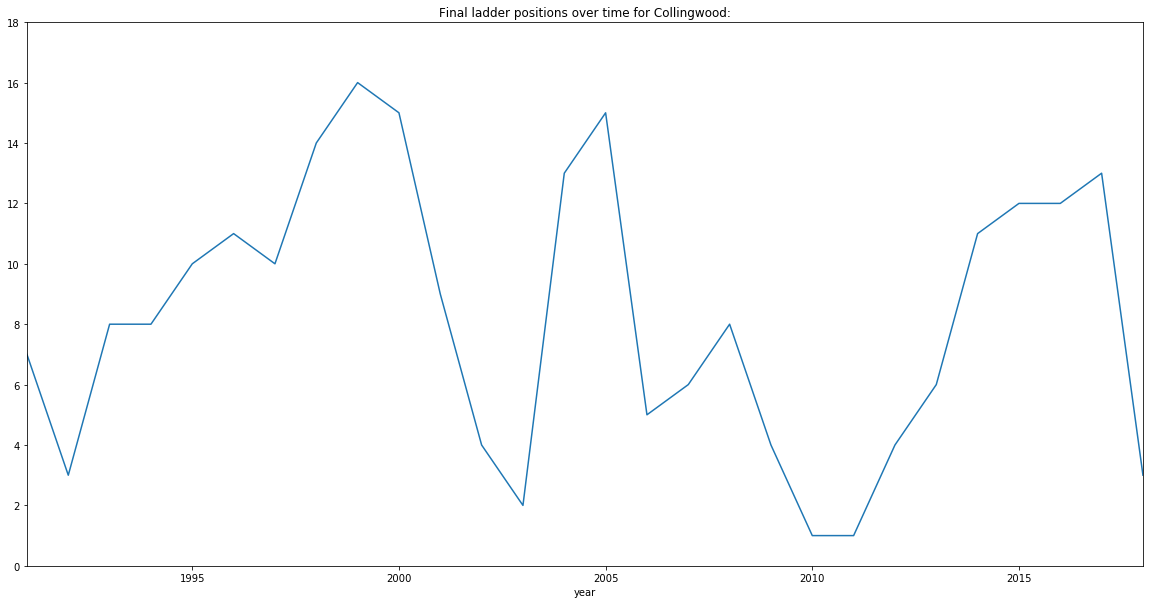

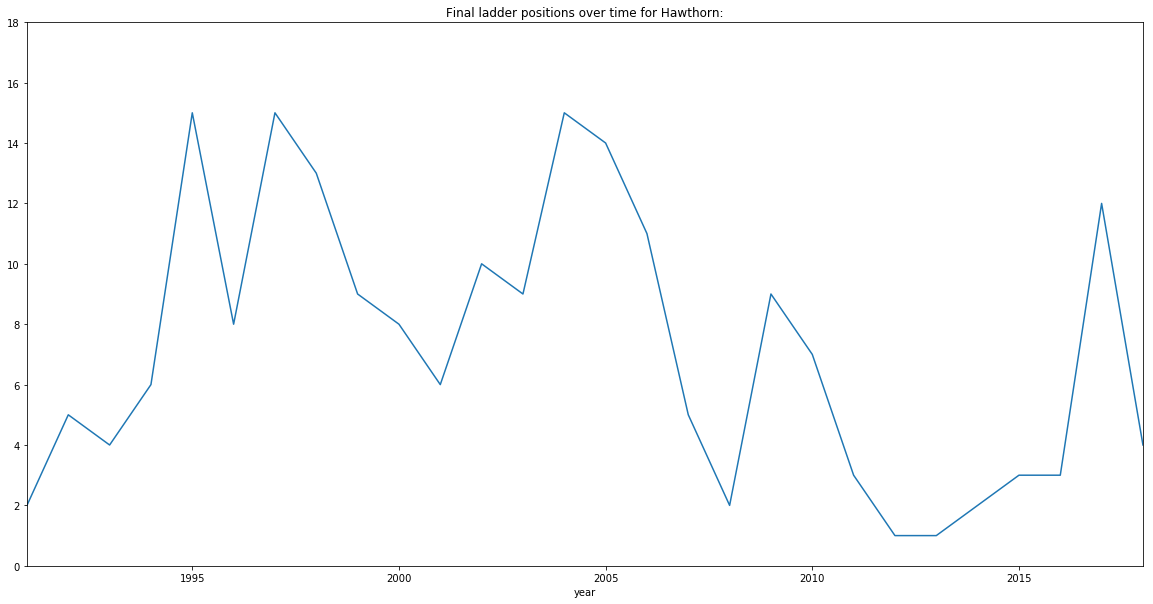

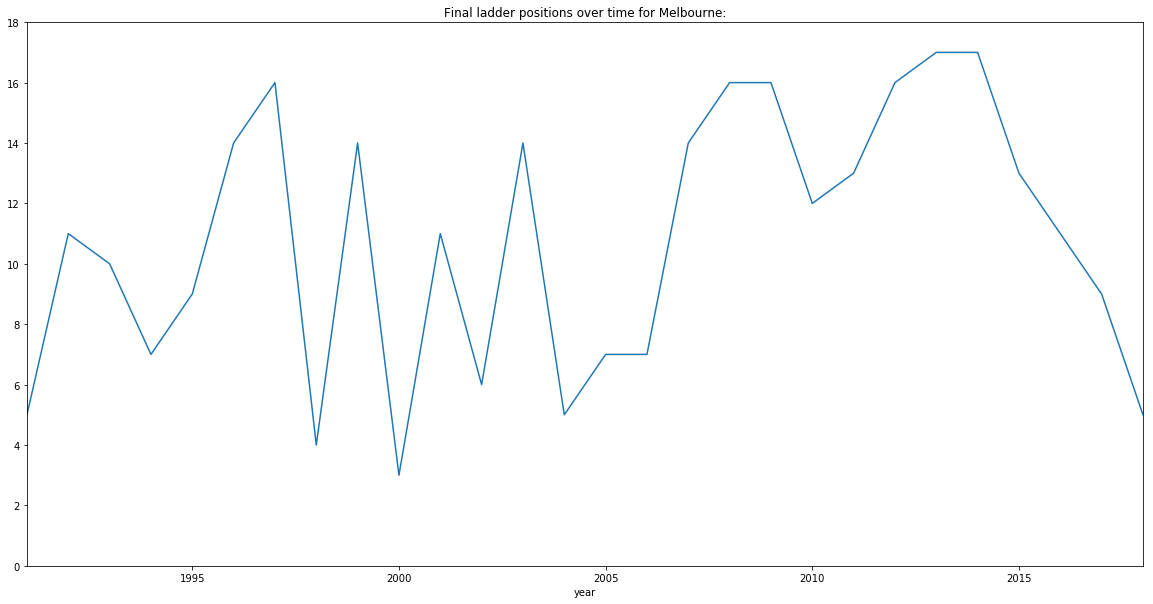

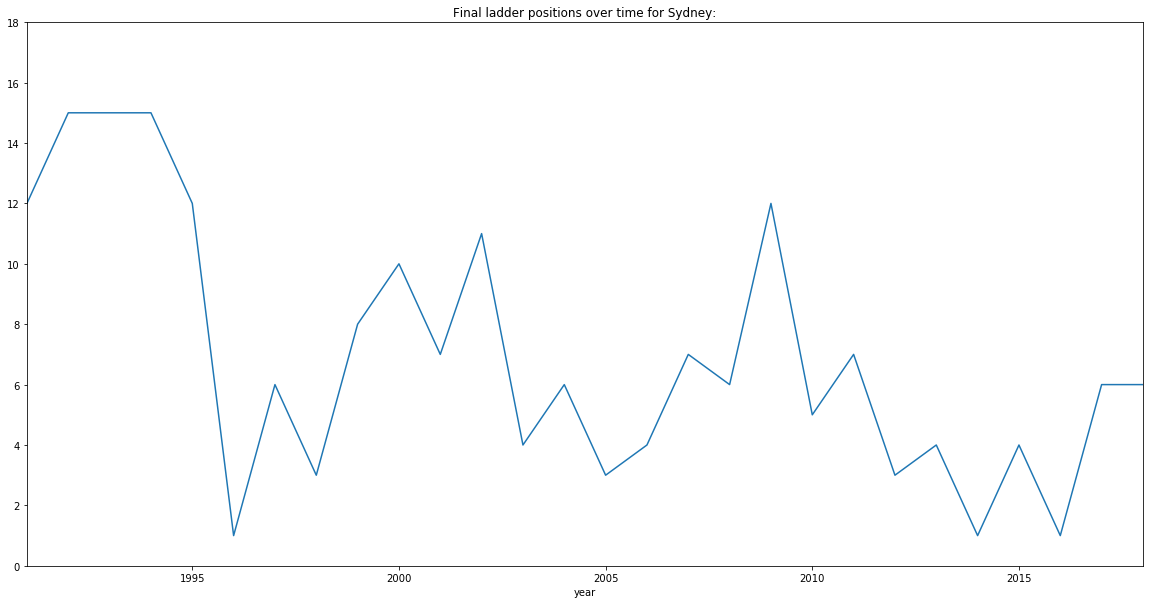

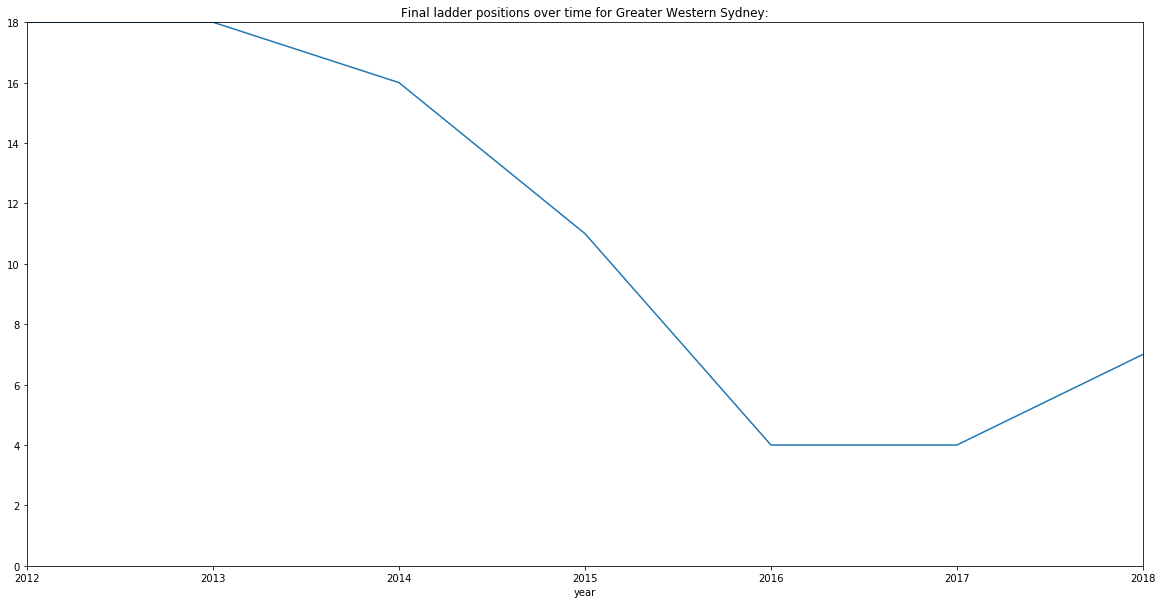

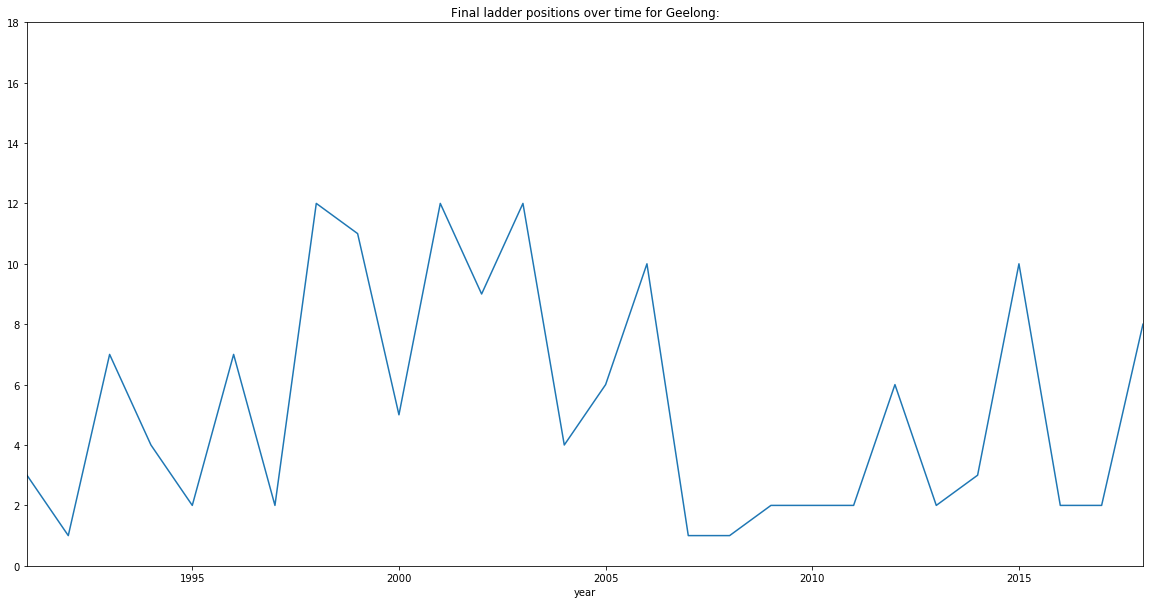

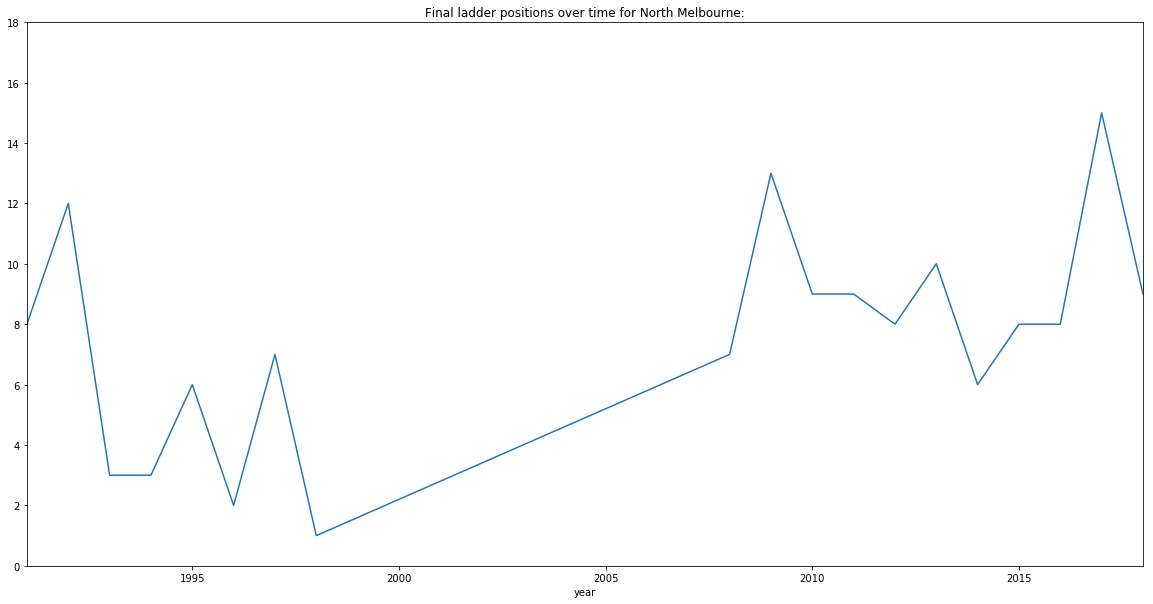

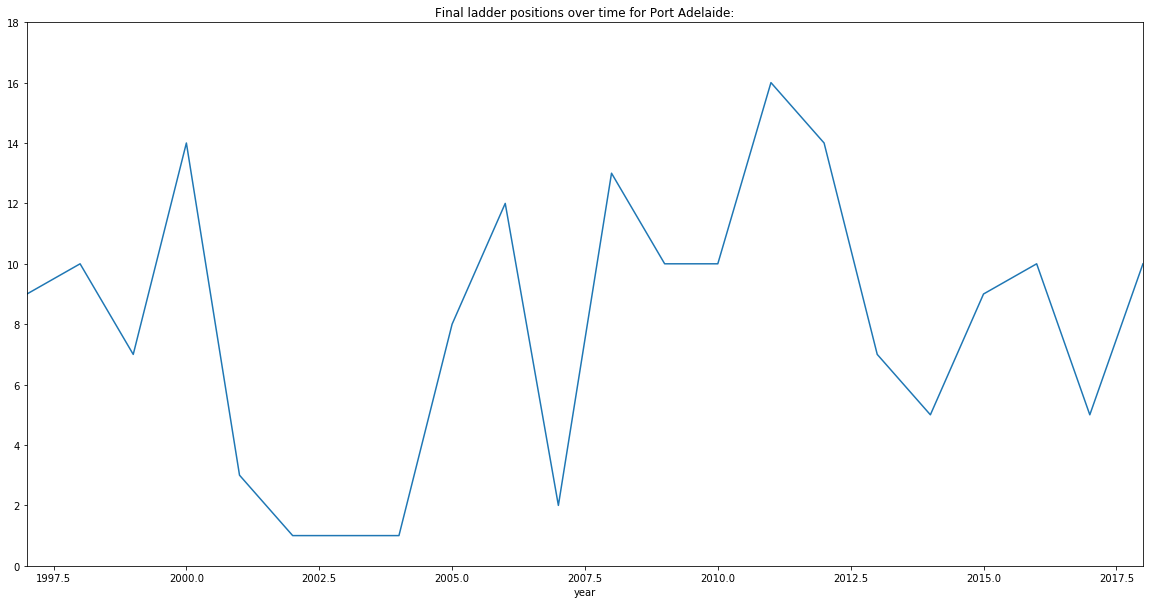

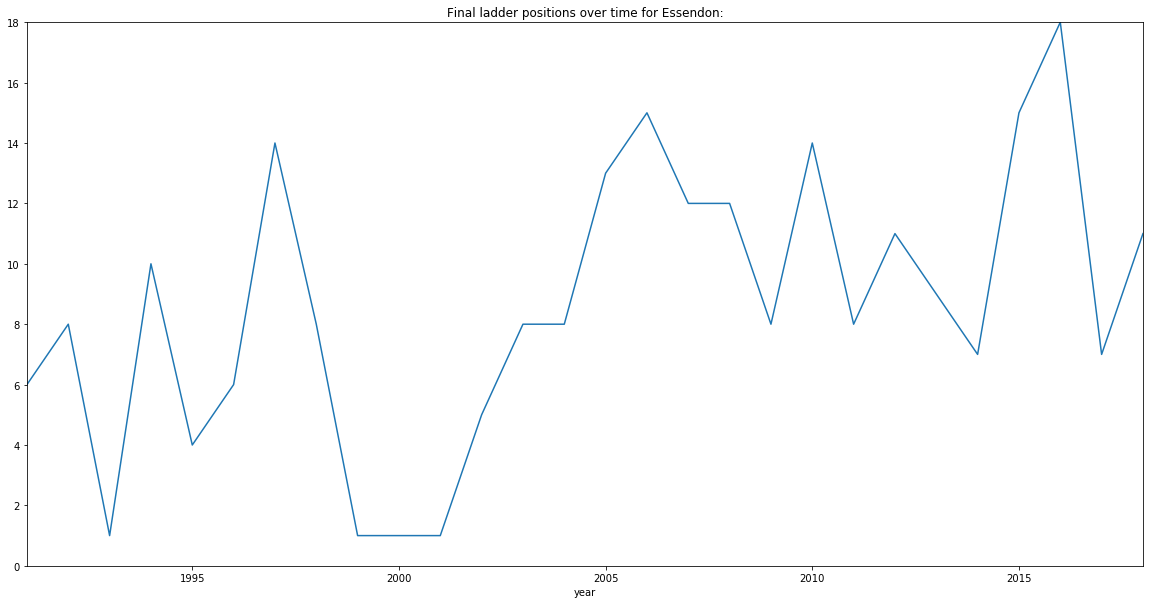

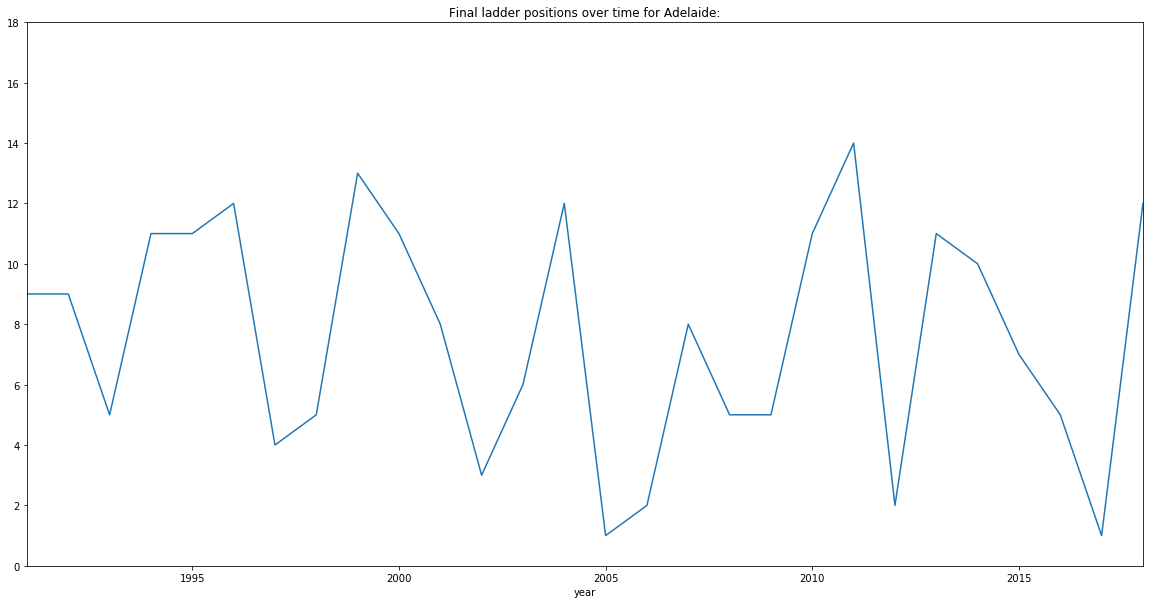

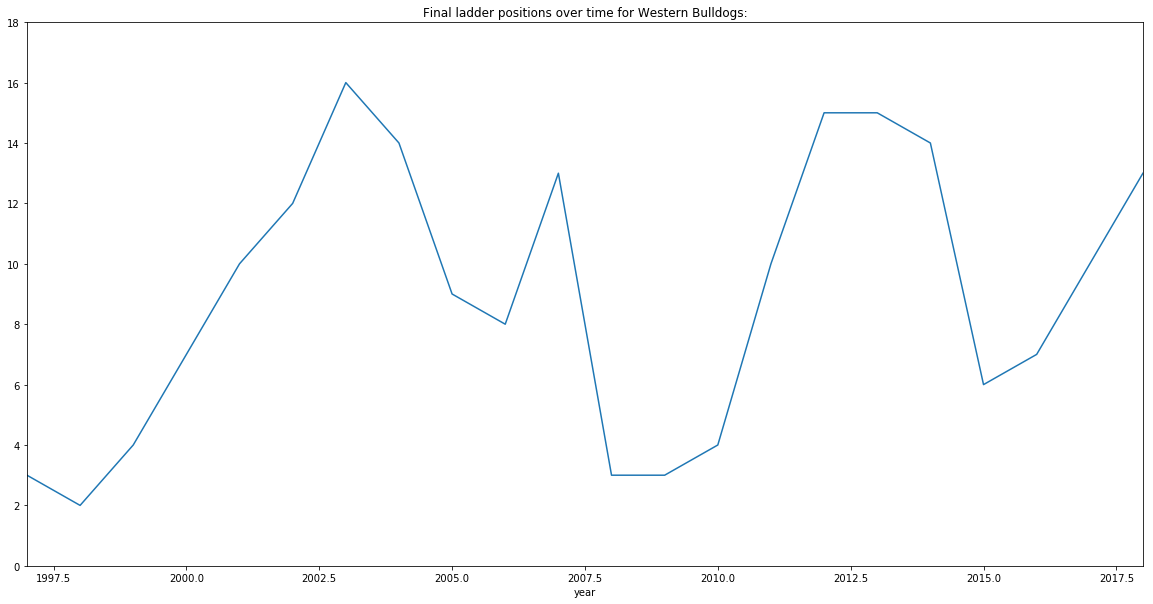

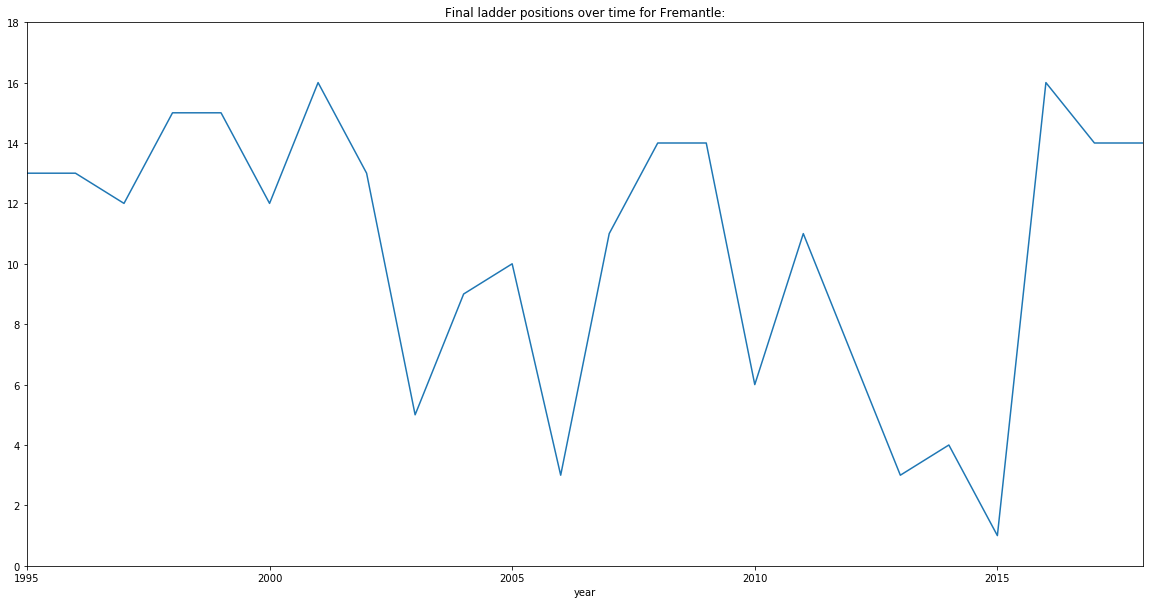

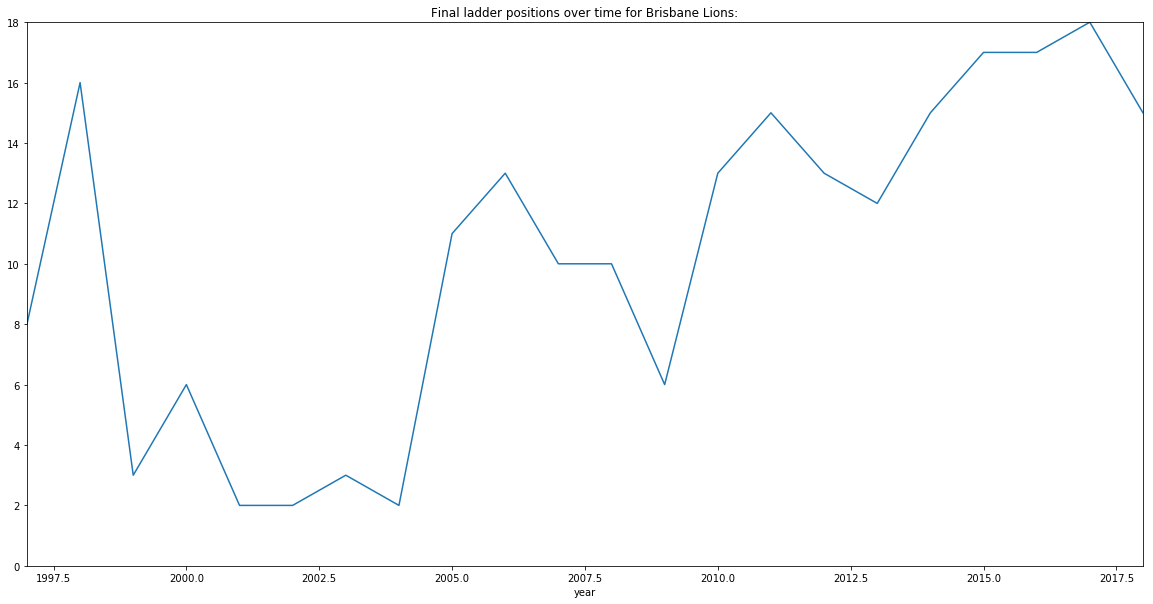

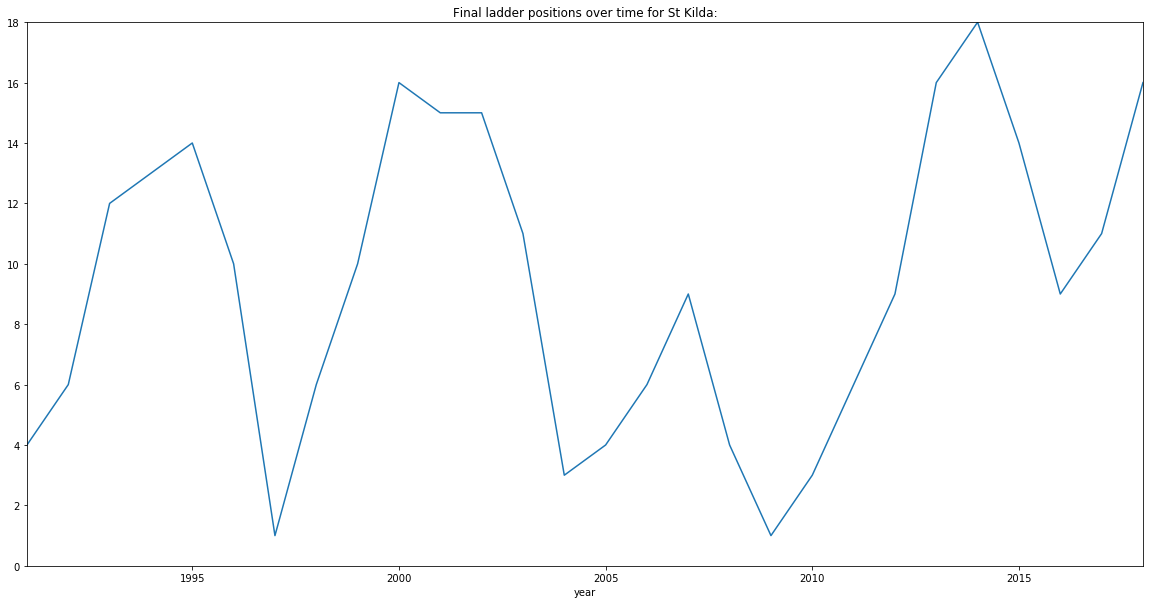

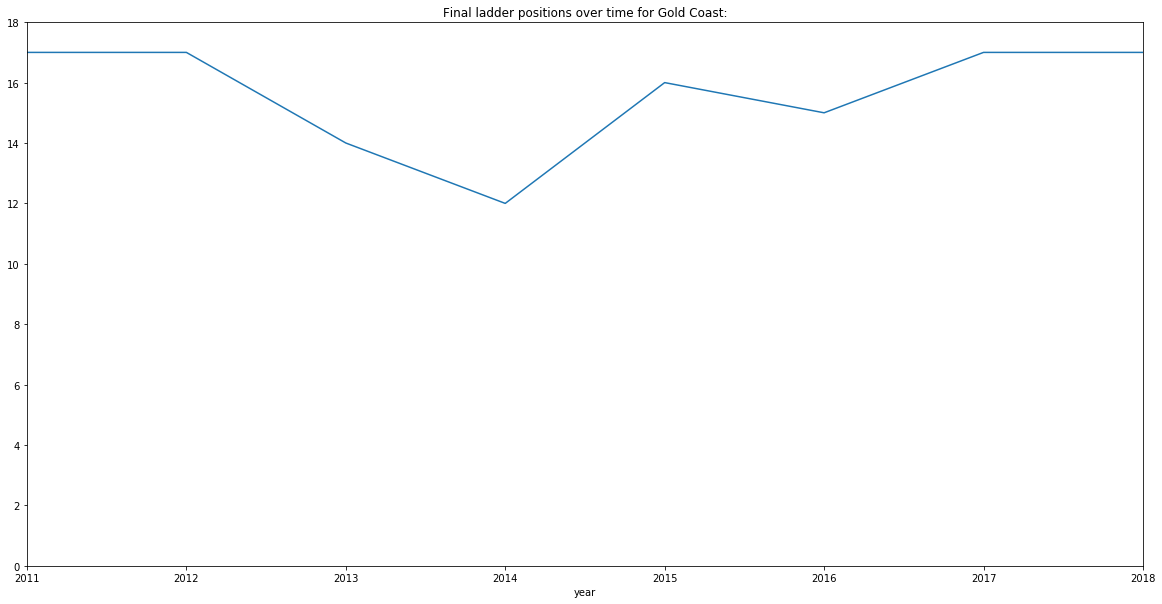

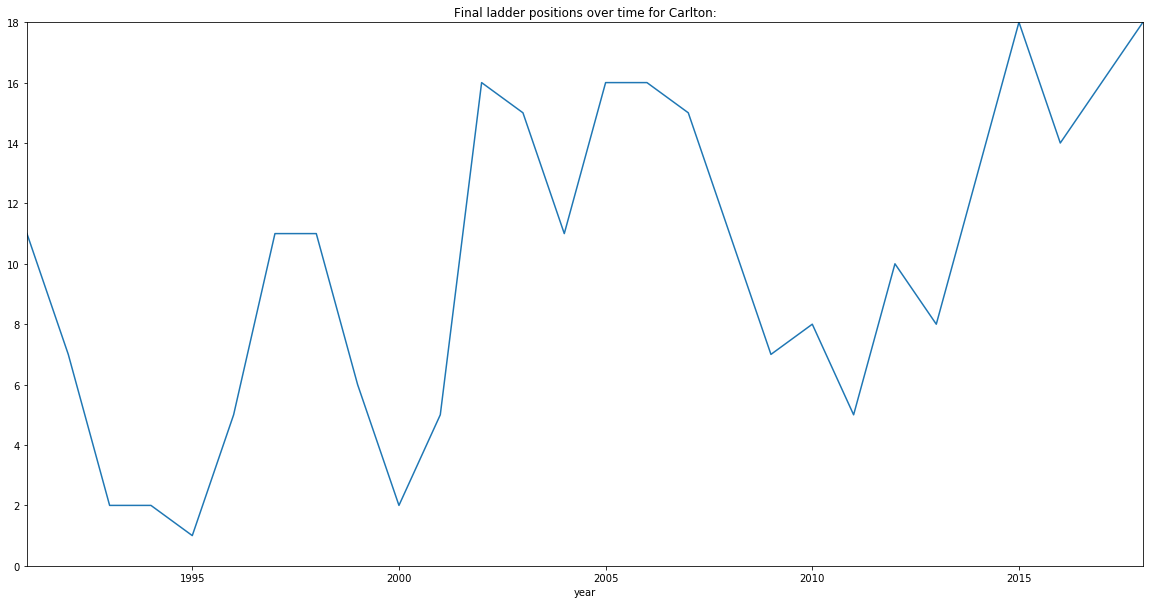

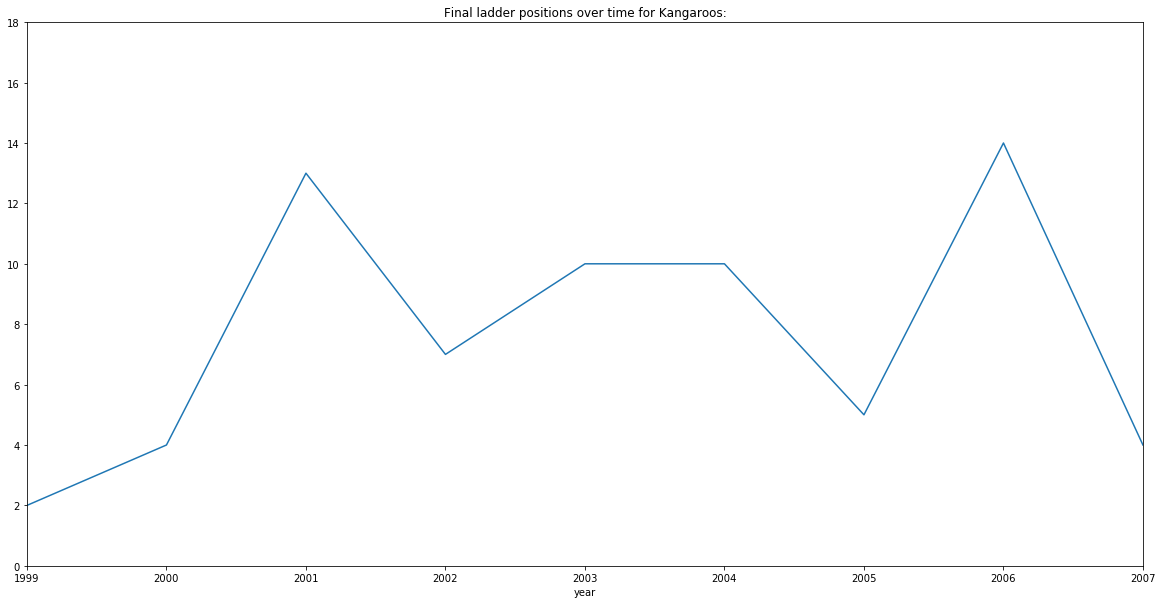

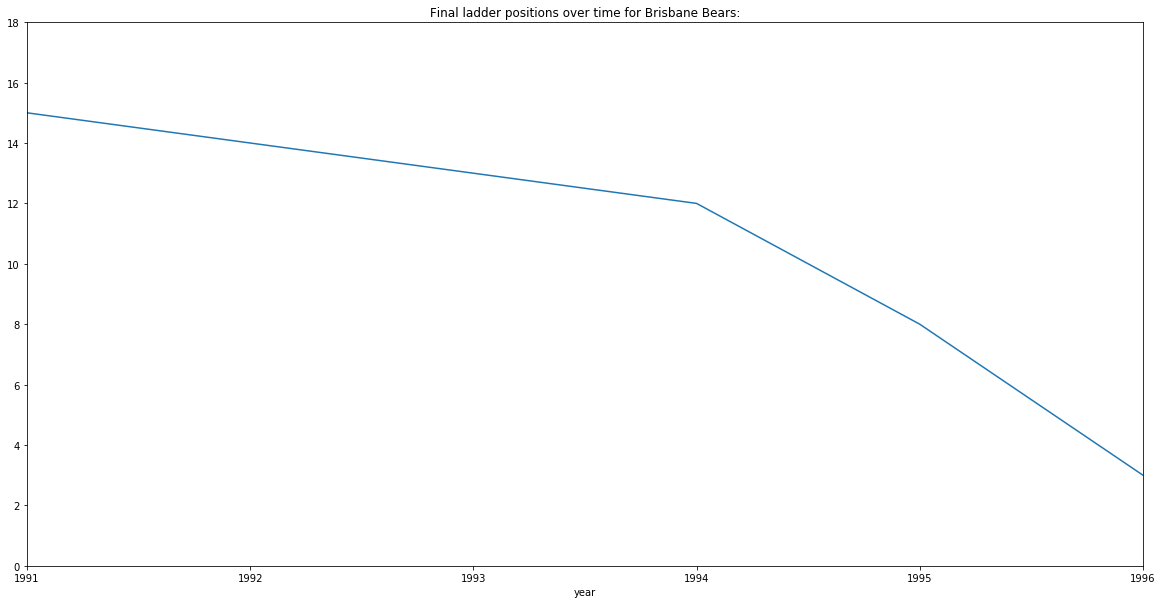

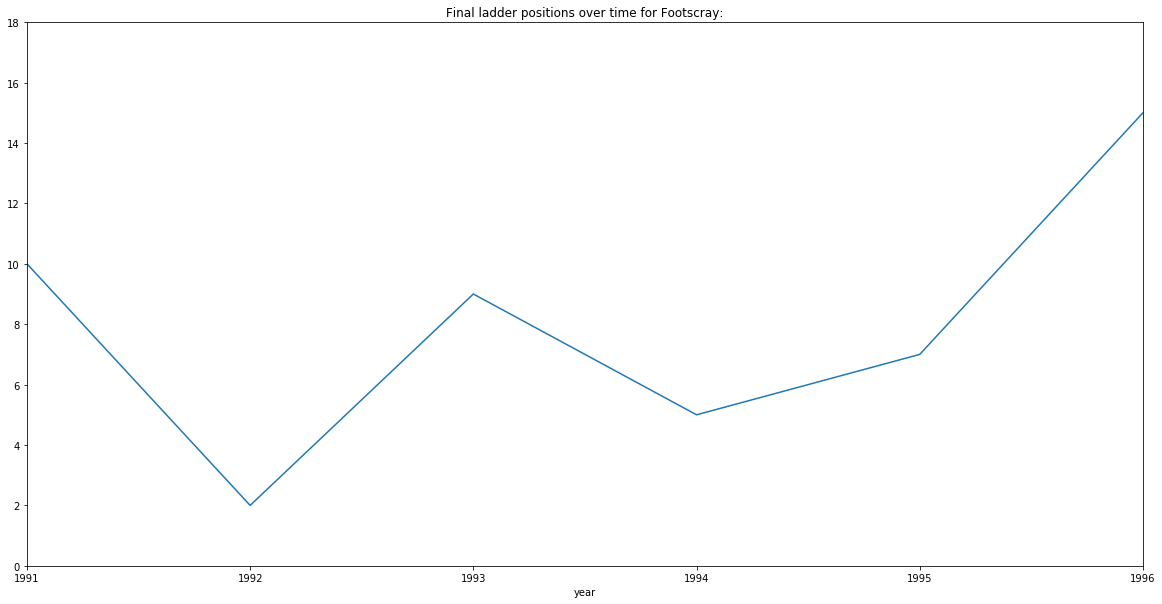

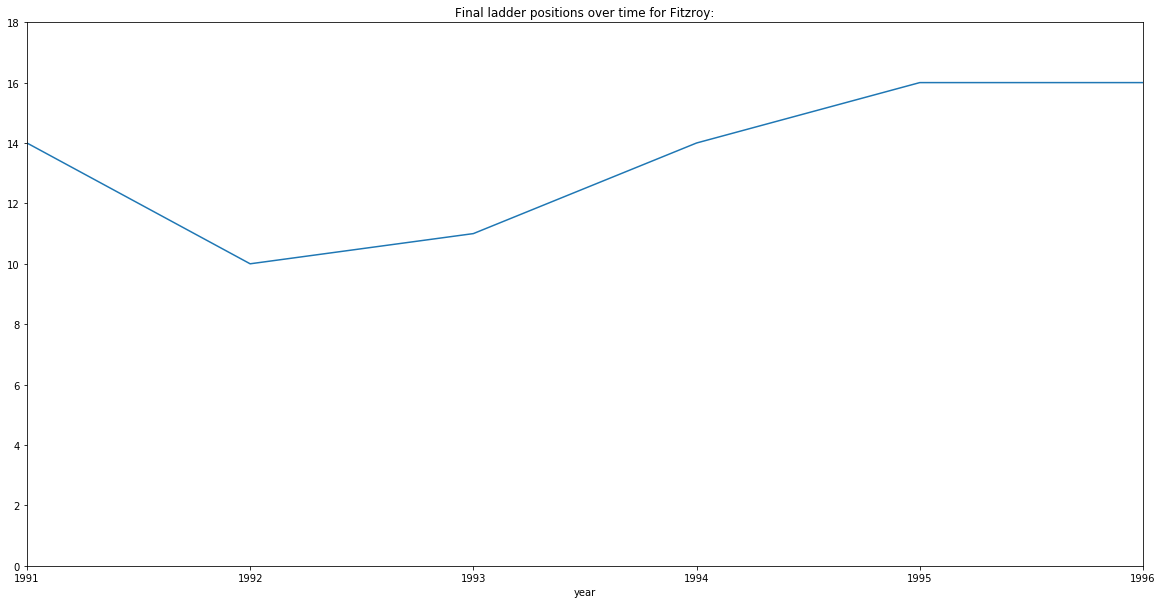

In [12]:
df = last_rounds.copy()
for team in df['team'].drop_duplicates():
    tmp = df[df['team'] == team].sort_values(by = ['year']).set_index('year')
    tmp['last_round'].plot(title = 'Final ladder positions over time for {}:'.format(team), ylim = (0, 18), figsize = (20, 10))
    plt.show()

Convert last round positions to a percentage: 1 for top team, 1/num_teams for bottom team

In [29]:
df = last_rounds.copy()
num_teams = df.groupby('year').size().to_frame().rename(columns = {0:'num_teams'})
df = df.merge(num_teams, left_on = ['year'], right_index = True)
df['score'] = (df['num_teams'] - df['last_round'])/(df['num_teams'] - 1)
last_rounds_2 = df
df.head()

,team,year,last_round,num_teams,score
0,Richmond,2018,1.0,18,1.000000
1,West Coast,2018,2.0,18,0.941176
2,Collingwood,2018,3.0,18,0.882353
3,Hawthorn,2018,4.0,18,0.823529
4,Melbourne,2018,5.0,18,0.764706


Find out how well each team did a given period ....

Split dataframe into each team

In [80]:
df = last_rounds_2.copy()
df = df.sort_values(by = ['team', 'year'])
teams = []
for team in df['team'].drop_duplicates():
    teams.append(df[df['team'] == team])

Create rolling standard deviation (std) of score for a given period - A low std means a team roughly stayed (in ladder success) the same in that period, vice versa for high std.

In [81]:
# (cell dependent on previous)
period = 6

for df in teams:
    df['{} rolling std_dev'.format(period)] = df['score'].rolling(period).std()
teams[0].head(10)

,team,year,last_round,num_teams,score,6 rolling std_dev
452,Adelaide,1991,9.0,15,0.428571,NaN
437,Adelaide,1992,9.0,15,0.428571,NaN
418,Adelaide,1993,5.0,15,0.714286,NaN
409,Adelaide,1994,11.0,15,0.285714,NaN
393,Adelaide,1995,11.0,16,0.333333,NaN
378,Adelaide,1996,12.0,16,0.266667,0.164406
354,Adelaide,1997,4.0,16,0.800000,0.229897
339,Adelaide,1998,5.0,16,0.733333,0.251213
331,Adelaide,1999,13.0,16,0.200000,0.260153
313,Adelaide,2000,11.0,16,0.333333,0.255314


Join all teams datasets back together into one

In [82]:
df = pd.concat(teams, axis = 0)
last_rounds_3 = df
df

,team,year,last_round,num_teams,score,6 rolling std_dev
452,Adelaide,1991,9.0,15,0.428571,NaN
437,Adelaide,1992,9.0,15,0.428571,NaN
418,Adelaide,1993,5.0,15,0.714286,NaN
409,Adelaide,1994,11.0,15,0.285714,NaN
393,Adelaide,1995,11.0,16,0.333333,NaN
378,Adelaide,1996,12.0,16,0.266667,0.164406
354,Adelaide,1997,4.0,16,0.800000,0.229897
339,Adelaide,1998,5.0,16,0.733333,0.251213
331,Adelaide,1999,13.0,16,0.200000,0.260153
313,Adelaide,2000,11.0,16,0.333333,0.255314


Find (and plot) the average rolling std for each year across all teams - as above, a low average std means a team roughly stayed the same in that period, vice versa for high std.

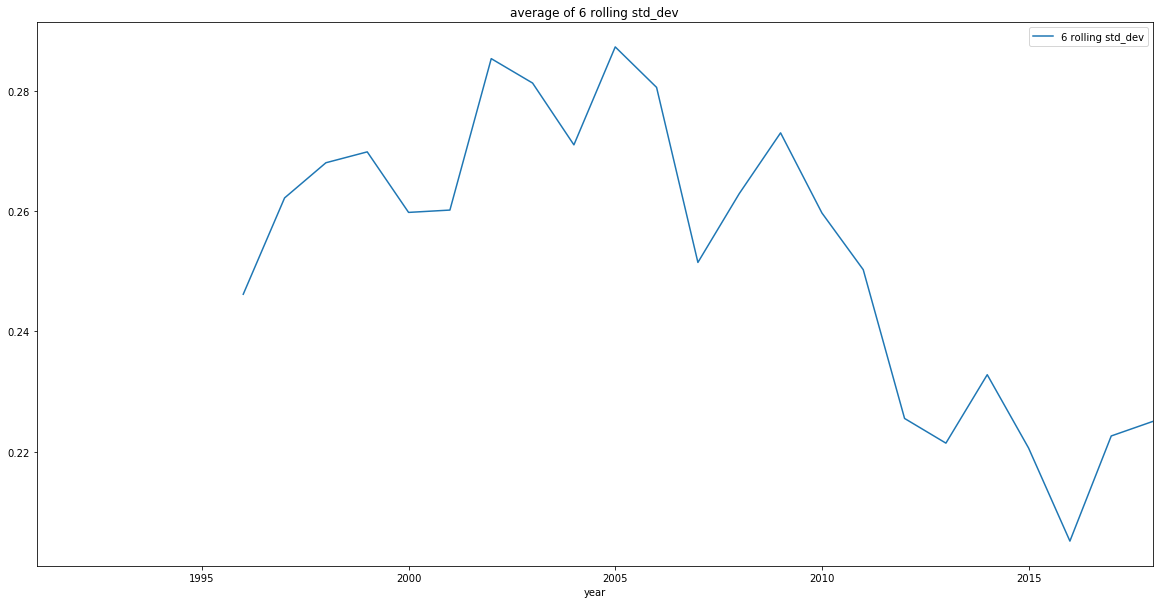

In [83]:
df = last_rounds_3.copy()
std = '{} rolling std_dev'.format(period)
df[['year', std]].groupby('year').mean().plot(figsize = (20, 10), title = 'average of '+ std)

Conclusion: Based on the above, it appears as though the afl is getting less competitive over time given how the moving average of rolling standard deviation by team is trending downwards. More evidence is needed to confirm.